In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Practical Coil  

Suppose that we have a practical coil with the following characteristics:  $L=0.1\mathrm{H}$, $R_L=10\Omega$, and $C_L = 0.1\mathrm{pF}$.  This exemplary coil is depicted in the figure below.  

![Fig-4.4.12](Figures/Fig-4.4.12.png)

In [2]:
L = 0.1; R_L = 10; C_L = 0.1e-12
omega_r = 1/np.sqrt(0.1*0.1e-12)
f_r = omega_r/(2*np.pi)

The magnitude of the impedance of this coil, denoted as '$Z_L(\omega)$', is given by equation (23b).

In [47]:
def fZ_L(omega):
    return (R_L**2 + omega**2*L**2)/(R_L**2 + (omega*C_L*(R_L**2 + omega**2*L**2)-omega*L)**2)

In [62]:
fZ_L(2*np.pi*1.5914755e6)

114536978.07096657

In [66]:
dZ_L(2*np.pi*1.591476e6)

497350.2454666747

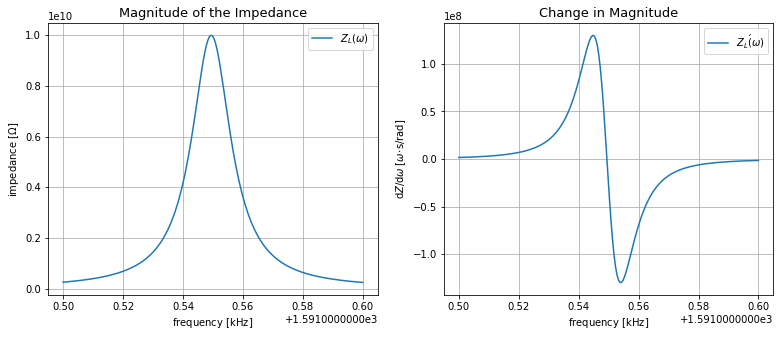

In [69]:
# Create the frequency domain.  
f = np.linspace(1.5915e6, 1.5916e6, num=200)
omega = 2*np.pi*f

# Define the magnitude of the impedance.
Z_L = (R_L**2 + omega**2*L**2)/(R_L**2 + (omega*C_L*(R_L**2 + omega**2*L**2)-omega*L)**2)

F = R_L**2 + omega**2*L**2
D = R_L**2 + (omega*C_L*F - omega*L)**2
dZ_L = 2*omega*L**2/D - 2*(C_L*F+2*omega**2*L**2*C_L-L)*F*(omega*C_L*F - omega*L)/(D**2)


# Create the figure and axes objects.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 5))

ax1.set_title('Magnitude of the Impedance', size=13)
ax1.set_ylabel(r'impedance [$\Omega$]')
ax1.set_xlabel(r'frequency [$\mathrm{kHz}$]')
ax1.set_yscale('linear')
ax1.grid()

ax2.set_title('Change in Magnitude', size=13)
ax2.set_xlabel(r'frequency [$\mathrm{kHz}$]')
ax2.set_ylabel(r'$\mathrm{d}Z/\mathrm{d}\omega\; [\omega \!\cdot\! \mathrm{s} / \mathrm{rad}]$')
ax2.grid()

# Plot the data.
ax1.plot(f/1e3, Z_L, label=r'$Z_L(\omega)$')
ax1.legend()

ax2.plot(f/1e3, dZ_L, label=r'$Z_L\'(\omega)$')
ax2.legend()

The proof for [equation (4.4.26)](FrequencyCharacteristics.ipynb#Practical-Coil-and-Practical-Capacitor):  

The impedance of a practical coil, with stray capacitance taken into consideration, is given by:  

\begin{equation}\tag{23a}
    Z_L(j\omega) = \frac{1}{Y_L(j\omega)}\quad\quad\text{where }\; Y_L(j\omega) = \frac{1}{R_L + j\omega L} + j\omega C_L
\end{equation}

$$ \frac{1}{R_L+j\omega L} = \frac{1}{\sqrt{R_L^2 + \omega^2L^2}}\,\angle\!-\!\arcsin\frac{\omega L}{\sqrt{R_L^2 + \omega^2 L^2}}$$

$$ = \frac{1}{R_L^2 + \omega^2 L^2} \,\big(R_L - j\omega L\big)$$

Thus,  

$$ Y_L(j\omega) = \frac{R_L}{R_L^2 + \omega^2L^2} + j\,\left(\omega C_L - \frac{\omega L}{R_L^2 + \omega^2L^2}\right)$$

$$ = \frac{R_L + j\Big(\omega C_L\big(R_L^2 + \omega^2 L^2\big) - \omega L \Big)}{R_L^2 + \omega^2 L^2}$$

Which implies that:  

$$ Y_L(\omega) = Y_L = \frac{R_L^2 + \Big(\omega C_L\big(R_L^2 + \omega^2 L^2\big) - \omega L \Big)^2}{R_L^2+\omega^2L^2}$$

and,  

\begin{equation}\tag{23b}
    Z_L(\omega) = Z_L = \frac{R_L^2+\omega^2L^2}{R_L^2 + \Big(\omega C_L\big(R_L^2 + \omega^2 L^2\big) - \omega L \Big)^2}
\end{equation}    

The resonant frequency satisfies the following:  

$$Z_L'(\omega_\mathrm{r}) = 0 $$

$$ Z_L'(\omega) = 2\frac{\omega L^2}{R_L^2 + \Big(\omega C_L\big(R_L^2 + \omega^2 L^2\big) - \omega L \Big)^2}\;- \dots $$

$$ \dots - \;2\Big(\omega C_L\big(R_L^2 + \omega^2 L^2\big) - \omega L \Big)\Big(C_L\big(R_L^2+\omega^2L^2\big) + 2\omega^2L^2 C_L -L\Big)\cdot\frac{R_L^2+\omega^2L^2}{\left(R_L^2 + \Big(\omega C_L\big(R_L^2 + \omega^2 L^2\big) - \omega L \Big)^2 \right)^2}$$

In [13]:
def dZ_L(omega):
    F = R_L**2 + omega**2*L**2
    D = R_L**2 + (omega*C_L*F - omega*L)**2
    return  2*omega*L**2/D - 2*(C_L*F+2*omega**2*L**2*C_L-L)*F*(omega*C_L*F - omega*L)/(D**2)

In [17]:
dZ_L(2*np.pi*1.6)

4.021236468809697e-13

Thus,  

$$\omega_\mathrm{r} L^2\,\left(R_L^2 + \Big(\omega_\mathrm{r} C_L\big(R_L^2 + \omega_\mathrm{r}^2 L^2\big) - \omega_\mathrm{r} L \Big)^2\right)  = \Big(C_L\big(R_L^2+\omega_\mathrm{r}^2L^2\big) + 2\omega_\mathrm{r}^2L^2 C_L -L\Big)\big(R_L^2+\omega_\mathrm{r}^2L^2\big) $$

$$ \omega_\mathrm{r} L^2 \left(R_L^2 + \big(\omega_\mathrm{r} C_LR_L^2 + \omega_\mathrm{r}^3C_LL^2 \big)^2+ \omega_\mathrm{r}^2L^2 - 2\Big(\omega_\mathrm{r}^2C_LL\big(R_L^2 + \omega_\mathrm{r}^2L^2\big) \Big)\right) = C_L\big(R_L^2+\omega_\mathrm{r}^2L^2\big)^2 + \big(2\omega_\mathrm{r}^2L^2C_L - L\big)\big(R_L^2 + \omega_\mathrm{r}^2L^2\big)$$